# Multivariate Time Series Forecasting

In [1]:
import pandas as pd
from pandas import read_csv
import numpy as np
import keras


Using TensorFlow backend.


In [2]:
from datetime import datetime
def parse(x):
    return datetime.strptime(x,'%Y %m %d %H')

data=read_csv('pollution.csv',parse_dates=[['year','month','day','hour']],index_col=0,date_parser=parse)
data.drop('No',axis=1,inplace=True)
data.fillna(0,inplace=True)
data=data[24:]
data
#saving file
data.to_csv("pollution_cool.csv")


1


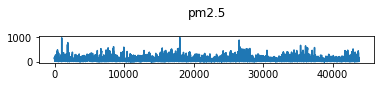

2


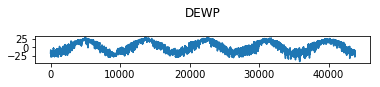

3


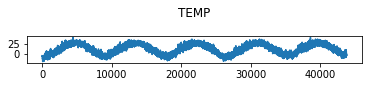

4


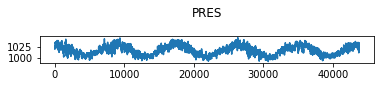

5


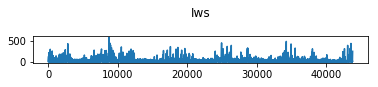

6


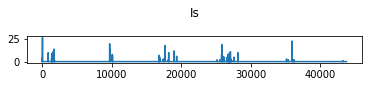

7


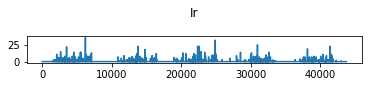

In [5]:
import matplotlib.pyplot as plt
data=read_csv("pollution_cool.csv",header=0,index_col=0)
values=data.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups),1,i)
    plt.plot(values[:,group])
    print(i)
    plt.title(data.columns[group],y=1.5)
    i+=1
    plt.show()



In [6]:
data.columns

Index(['pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir'], dtype='object')

In [7]:
pd.read_csv('pollution_cool.csv')

,year_month_day_hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
1,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
3,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
4,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
5,2010-01-02 05:00:00,109.0,-7,-6.0,1022.0,SE,7.14,3,0
6,2010-01-02 06:00:00,105.0,-7,-6.0,1023.0,SE,8.93,4,0
7,2010-01-02 07:00:00,124.0,-7,-5.0,1024.0,SE,10.72,0,0
8,2010-01-02 08:00:00,120.0,-8,-6.0,1024.0,SE,12.51,0,0
9,2010-01-02 09:00:00,132.0,-7,-5.0,1025.0,SE,14.30,0,0


In [8]:
# convert series to supervised learning
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from numpy import concatenate
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
dataset = read_csv('pollution_cool.csv', header=0, index_col=0)
dataset.drop(dataset.columns[[4]],axis=1,inplace=True)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[8,9,10,11,12,13]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.002153   0.000000   
2   0.148893   0.367647   0.245902   0.527273   0.004306   0.000000   
3   0.159960   0.426471   0.229508   0.545454   0.006100   0.000000   
4   0.182093   0.485294   0.229508   0.563637   0.011123   0.037037   
5   0.138833   0.485294   0.229508   0.563637   0.013635   0.074074   

   var7(t-1)   var1(t)  
1        0.0  0.148893  
2        0.0  0.159960  
3        0.0  0.182093  
4        0.0  0.138833  
5        0.0  0.109658  


In [9]:
# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train=values[:n_train_hours*2,:]
valid=values[(n_train_hours*2):(n_train_hours*3),:]
test=values[(n_train_hours*3):,:]

# split into input and outputs

train_X, train_Y = train[:, :-1], train[:, -1]
valid_X, valid_Y = valid[:, :-1], valid[:, -1]
test_X, test_Y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]

train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
valid_X = valid_X.reshape((valid_X.shape[0], 1, valid_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

print("train_X_shape=",train_X.shape)
print("train_Y_shape=",train_Y.shape)
print("validation_X_shape=",valid_X.shape)
print("validation_Y_shape=",valid_Y.shape)
print("test_X_shape=",test_X.shape)
print("test_Y_shape=",test_Y.shape)


train_X_shape= (17520, 1, 7)
train_Y_shape= (17520,)
validation_X_shape= (8760, 1, 7)
validation_Y_shape= (8760,)
test_X_shape= (17519, 1, 7)
test_Y_shape= (17519,)


In [39]:
# design network
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_Y, epochs=50, batch_size=72, validation_data=(valid_X, valid_Y), verbose=2, shuffle=False)


Train on 17520 samples, validate on 8760 samples
Epoch 1/50
 - 4s - loss: 0.0529 - val_loss: 0.0497
Epoch 2/50
 - 1s - loss: 0.0214 - val_loss: 0.0401
Epoch 3/50
 - 1s - loss: 0.0155 - val_loss: 0.0232
Epoch 4/50
 - 1s - loss: 0.0148 - val_loss: 0.0194
Epoch 5/50
 - 1s - loss: 0.0144 - val_loss: 0.0176
Epoch 6/50
 - 1s - loss: 0.0143 - val_loss: 0.0160
Epoch 7/50
 - 1s - loss: 0.0143 - val_loss: 0.0158
Epoch 8/50
 - 1s - loss: 0.0143 - val_loss: 0.0150
Epoch 9/50
 - 1s - loss: 0.0142 - val_loss: 0.0155
Epoch 10/50
 - 1s - loss: 0.0142 - val_loss: 0.0153
Epoch 11/50
 - 1s - loss: 0.0142 - val_loss: 0.0154
Epoch 12/50
 - 1s - loss: 0.0141 - val_loss: 0.0151
Epoch 13/50
 - 1s - loss: 0.0141 - val_loss: 0.0154
Epoch 14/50
 - 1s - loss: 0.0142 - val_loss: 0.0151
Epoch 15/50
 - 1s - loss: 0.0142 - val_loss: 0.0148
Epoch 16/50
 - 1s - loss: 0.0142 - val_loss: 0.0148
Epoch 17/50
 - 1s - loss: 0.0142 - val_loss: 0.0148
Epoch 18/50
 - 1s - loss: 0.0142 - val_loss: 0.0149
Epoch 19/50
 - 1s - loss

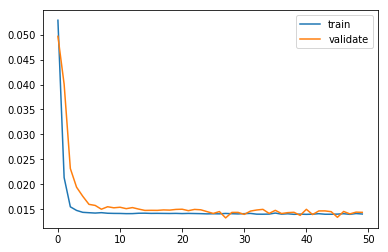

In [40]:
#plot history
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validate')
plt.legend()
plt.show()


In [20]:
# make a prediction

from sklearn.metrics import mean_squared_error
from math import sqrt
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast

inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual

test_Y = test_Y.reshape((len(test_Y), 1))
inv_y = concatenate((test_Y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 27.434


# MULTIPLE LAG TIME STEPS (TIME SERIES PREDICTION)

In [21]:

#creating dataframe for lstm
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from keras.utils import np_utils

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars=1 if type(data) is list else data.shape[1]
    df=pd.DataFrame(data)
    cols,names=list(),list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in,0,-1):
        cols.append(df.shift(i))
        names+=[('var%d(t-%d)' % (j+1,i)) for j in range (n_vars)]
    
    #print(cols)
    
    # forecast sequence (t, t+1, ... t+n)
    
    for i in range(0,n_out):
        cols.append(df.shift(-i))
        if i==0:
            names+=[('var%d(t)' % (j+1)) for j in range(n_vars)]
            
        else:
            names+=[('var%d(t+%d)' % (j+1,i)) for j in range(n_vars)]
    
    #print(cols)
    
    #put it all together
    agg=pd.concat(cols,axis=1)
    agg.columns=names
    
    #drop rows with NAN values
    
    if dropnan:
        agg.dropna(inplace=True)
    
    #print(agg)
    return agg

# load dataset
dataset = read_csv('pollution_cool.csv', header=0, index_col=0)
dataset.drop(dataset.columns[[4]],axis=1,inplace=True)
values = dataset.values
    
# integer encode direction
encoder = LabelEncoder()
values[:,4]=encoder.fit_transform(values[:,4])


#values[:,8]=np_utils.to_categorical(values[:,8],num_classes=None, dtype='float32')


#creating to float

values=values.astype('float32')

#normalization

scaler=MinMaxScaler(feature_range=(0,1))
scaled=scaler.fit_transform(values)
n_hours = 3
n_features = 7

reframed=series_to_supervised(scaled,n_hours,1)
print(reframed.head())
# drop columns we don't want to predict
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
reframed.to_csv("reframed.csv")



   var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3   0.129779   0.352941   0.245902   0.527273   0.002153   0.000000   
4   0.148893   0.367647   0.245902   0.527273   0.004306   0.000000   
5   0.159960   0.426471   0.229508   0.545454   0.006100   0.000000   
6   0.182093   0.485294   0.229508   0.563637   0.011123   0.037037   
7   0.138833   0.485294   0.229508   0.563637   0.013635   0.074074   

   var7(t-3)  var1(t-2)  var2(t-2)  var3(t-2)  ...  var5(t-1)  var6(t-1)  \
3        0.0   0.148893   0.367647   0.245902  ...   0.006100   0.000000   
4        0.0   0.159960   0.426471   0.229508  ...   0.011123   0.037037   
5        0.0   0.182093   0.485294   0.229508  ...   0.013635   0.074074   
6        0.0   0.138833   0.485294   0.229508  ...   0.016505   0.111111   
7        0.0   0.109658   0.485294   0.213115  ...   0.023323   0.148148   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)   var5(t)   var6(t)  \
3        0.0  0.182093  0.485294  0.2295

In [22]:
#splitting into train-test
values=reframed.values
n_train_hours=365*24

train=values[:n_train_hours*2,:]
valid=values[(n_train_hours*2):(n_train_hours*3),:]
test=values[(n_train_hours*3):,:]

#split into input output
n_obs=n_hours*n_features
train_X,train_Y=train[:,:n_obs],train[:,-n_features]
validation_X,validation_Y=valid[:,:n_obs],valid[:,-n_features]
test_X,test_Y=test[:,:n_obs],test[:,-n_features]

print("train_X_shape=",train_X.shape)
print("train_Y_shape=",train_Y.shape)
print("validation_X_shape=",validation_X.shape)
print("validation_Y_shape=",validation_Y.shape)
print("test_X_shape=",test_X.shape)
print("test_Y_shape=",test_Y.shape)


train_X_shape= (17520, 21)
train_Y_shape= (17520,)
validation_X_shape= (8760, 21)
validation_Y_shape= (8760,)
test_X_shape= (17517, 21)
test_Y_shape= (17517,)


In [59]:
#reshape input into 3D tensor 
train_X=train_X.reshape((train_X.shape[0],n_hours,n_features))
validation_X=validation_X.reshape((validation_X.shape[0],n_hours,n_features))
test_X=test_X.reshape((test_X.shape[0],n_hours,n_features))
print("train_X.shape=",train_X.shape)
print("train_Y_shape=",train_Y.shape)
print("validation_X_shape=",validation_X.shape)
print("validation_Y_shape=",validation_Y.shape)
print("test_X.shape=",test_X.shape)
print("test_Y_shape=",test_Y.shape)


train_X.shape= (17520, 3, 7)
train_Y_shape= (17520,)
validation_X_shape= (8760, 3, 7)
validation_Y_shape= (8760,)
test_X.shape= (17517, 3, 7)
test_Y_shape= (17517, 1)


In [56]:
#model
from keras.models import Sequential
from keras.layers import Dense,LSTM
model=Sequential()
model.add(LSTM(50,input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
history=model.fit(train_X,train_Y,epochs=20,batch_size=72,validation_data=(validation_X,validation_Y),verbose=1,shuffle=False)


Train on 17520 samples, validate on 8760 samples
Epoch 1/20
17520/17520 [==============================] - 5s 287us/step - loss: 0.0040 - acc: 0.0784 - val_loss: 0.0072 - val_acc: 0.0561
Epoch 2/20
17520/17520 [==============================] - 1s 76us/step - loss: 0.0014 - acc: 0.0784 - val_loss: 0.0019 - val_acc: 0.0561
Epoch 3/20
17520/17520 [==============================] - 1s 74us/step - loss: 0.0013 - acc: 0.0784 - val_loss: 0.0016 - val_acc: 0.0561
Epoch 4/20
17520/17520 [==============================] - 1s 83us/step - loss: 0.0012 - acc: 0.0784 - val_loss: 0.0015 - val_acc: 0.0561
Epoch 5/20
17520/17520 [==============================] - 1s 77us/step - loss: 0.0012 - acc: 0.0783 - val_loss: 0.0014 - val_acc: 0.0561
Epoch 6/20
17520/17520 [==============================] - 2s 93us/step - loss: 0.0011 - acc: 0.0783 - val_loss: 0.0013 - val_acc: 0.0561
Epoch 7/20
17520/17520 [==============================] - 2s 88us/step - loss: 0.0010 - acc: 0.0783 - val_loss: 0.0012 - val_acc

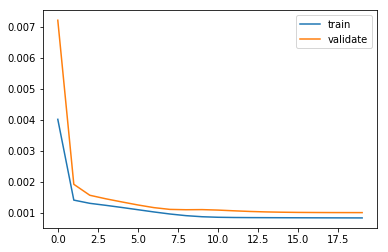

In [57]:
#plot history
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validate')
plt.legend()
plt.show()


In [60]:
from numpy import concatenate
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))

#print(yhat.shape)
#print(test_X.shape)

# invert scaling for forecast

test_Y=test_Y.reshape(len(test_Y),1)
#print(test_Y.shape)
inv_yhat = concatenate((yhat, test_X[:,-6:]),axis=1)
#print(inv_yhat.shape)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual

test_y = test_Y.reshape((len(test_Y), 1))
inv_y = concatenate((test_Y, test_X[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 32.125
